In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import plotly

In [ ]:
 from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/jobathon/train.csv')

Mounted at /content/drive


In [ ]:
data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


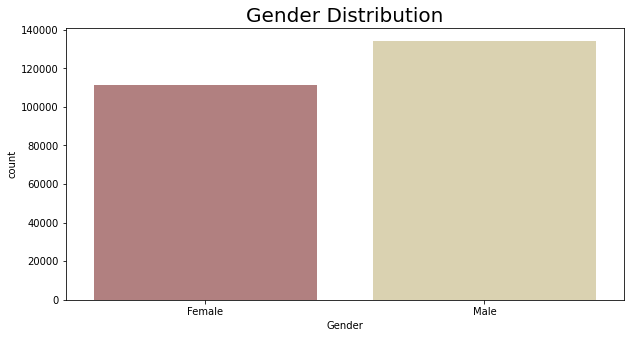

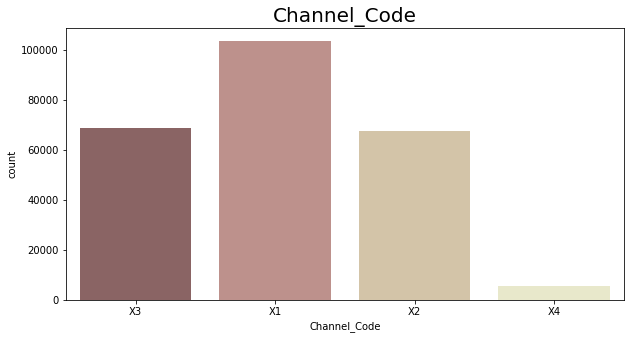

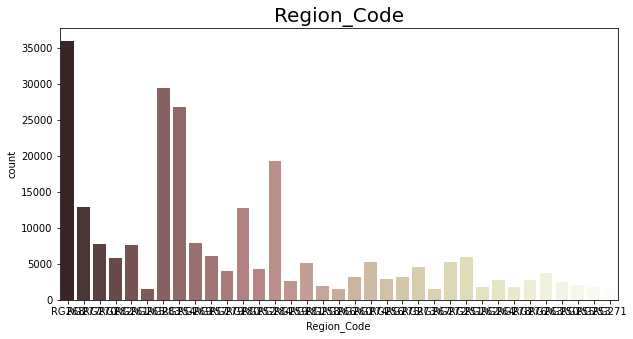

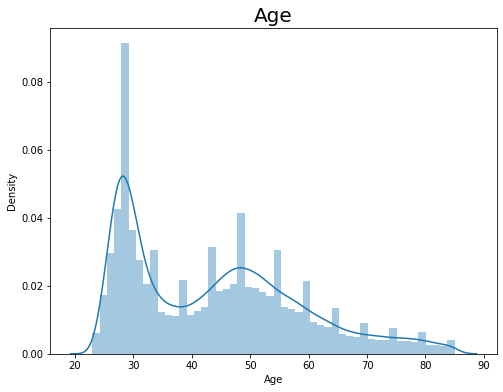

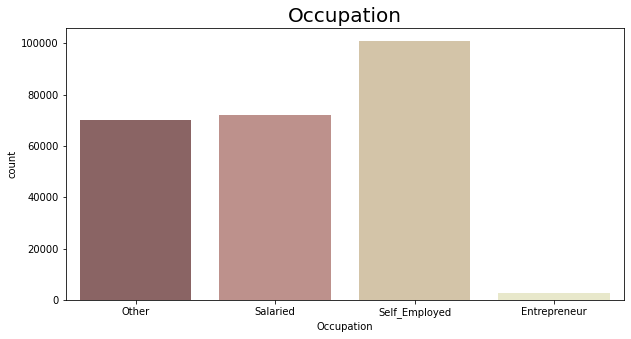

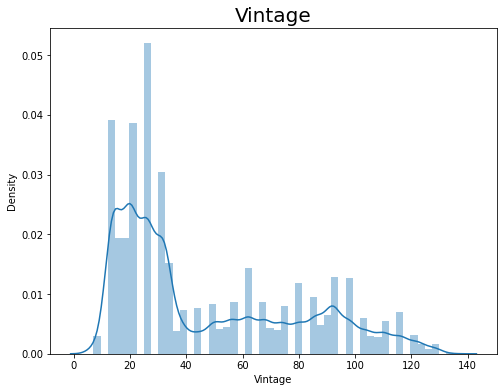

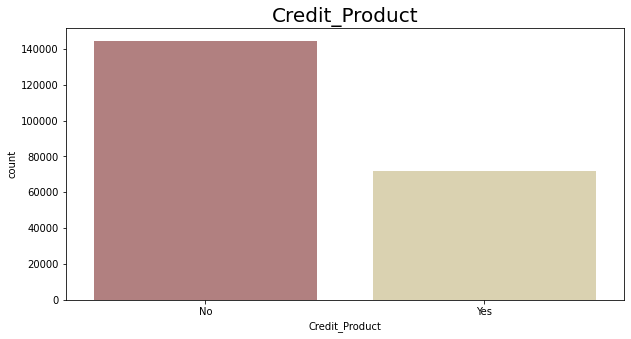

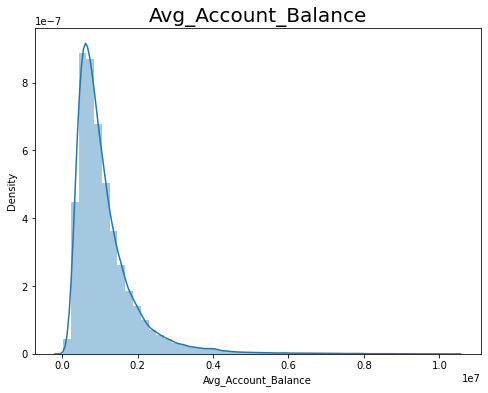

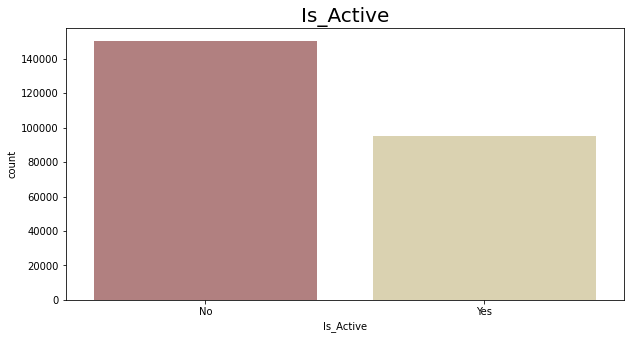

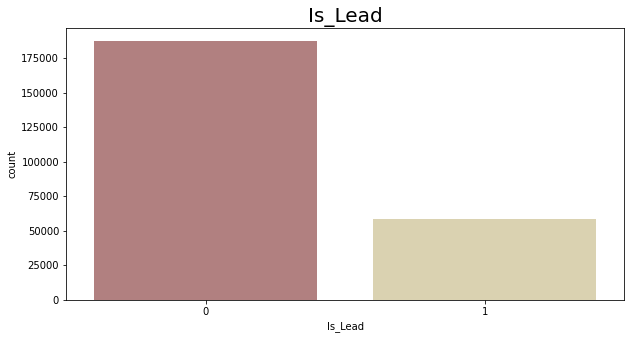

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Gender'], palette = 'pink')
plt.title('Gender Distribution', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Channel_Code'], palette = 'pink')
plt.title('Channel_Code', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Region_Code'], palette = 'pink')
plt.title('Region_Code', fontsize = 20)
plt.show()
# Remove it, maybe not related to the output

f, ax = plt.subplots(figsize=(8,6))
x = data['Age']
ax = sns.distplot(x, bins =50)
plt.title('Age', fontsize = 20)
plt.show()
# people are buying houses at the age of 30(home loans) and at the age of 50(for their children's college and other expenses)

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Occupation'], palette = 'pink')
plt.title('Occupation', fontsize = 20)
plt.show()
# very unbalanced data wrt the entrepreneur attribute

f, ax = plt.subplots(figsize=(8,6))
x = data['Vintage']
ax = sns.distplot(x, bins =50)
plt.title('Vintage', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Credit_Product'], palette = 'pink')
plt.title('Credit_Product', fontsize = 20)
plt.show()
# unbalanced towards No(Need to imputate the N/A values)

f, ax = plt.subplots(figsize=(8,6))
x = data['Avg_Account_Balance']
ax = sns.distplot(x, bins =50)
plt.title('Avg_Account_Balance', fontsize = 20)
plt.show()
# typical

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Is_Active'], palette = 'pink')
plt.title('Is_Active', fontsize = 20)
plt.show()
# unbalanced

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Is_Lead'], palette = 'pink')
plt.title('Is_Lead', fontsize = 20)
plt.show()
# Unbalanced dataset


# leaving region code for now(Imputation)


In [ ]:
data["Credit_Product"] = data["Credit_Product"].fillna("NA")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


## Input data creation

Normalise numeric data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
mean_age = data["Age"].mean()
std_age = data["Age"].std()

mean_vintage = data["Vintage"].mean()
std_vintage = data["Vintage"].std()

mean_accbal = data["Avg_Account_Balance"].mean()
std_accbal = data["Avg_Account_Balance"].std()


In [ ]:
data['Age'] = data['Age'].apply(lambda x : (x-mean_age)/std_age)
data['Vintage'] = data['Vintage'].apply(lambda x : (x-mean_vintage)/std_vintage)
data['Avg_Account_Balance'] = data['Avg_Account_Balance'].apply(lambda x : (x-mean_accbal)/std_accbal)

In [ ]:
def input_data(x):
  ans = []
  for attr in nominal_attr:
    n = len(ans)
    ans = ans+[0]*nominal_attr[attr]
    ans[n+ attr_index_map[attr][x[attr]]] = 1
  ans = ans + [ x['Age'], x['Vintage'], x['Avg_Account_Balance']]  
  return ans

In [ ]:
# [nominal attr, numerical attr]
nominal_attr = {'Gender' : 2, "Occupation" : 4, "Channel_Code": 4, "Credit_Product": 3, "Is_Active" : 2}
Gender = {"Male" : 0, "Female" : 1}
Occupation  = {"Other" : 0, "Salaried" : 1, "Self_Employed" : 2, "Entrepreneur" : 3}
Channel_Code = {"X1" : 0, "X2" : 1, "X3" : 2, "X4" : 3}
Credit_Product = {"Yes" : 0, "No" : 1, "NA" : 2}
Is_Active = {"Yes" : 0, "No" : 1}
attr_index_map = {'Gender' : Gender, "Occupation" : Occupation, "Channel_Code": Channel_Code, "Credit_Product": Credit_Product, "Is_Active" : Is_Active}

for attr in nominal_attr:
  data[attr] = data[attr].astype('str')

input = list(data.apply(input_data, axis=1).to_numpy())

In [ ]:
input = np.array(input)

In [ ]:
input.shape

(245725, 18)

In [ ]:
output = data["Is_Lead"].to_numpy()

In [ ]:
output.shape

(245725,)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf
from keras import backend as K


def model():
  inp = keras.layers.Input(shape = (18))
  out = tf.keras.layers.Dense(100, activation = 'relu')(inp)
  out = tf.keras.layers.Dense(100, activation = 'relu')(out)
  out = tf.keras.layers.Dense(80, activation = 'elu')(out)
  out = tf.keras.layers.Dense(70, activation = 'elu')(out)
  out = tf.keras.layers.Dense(60, activation = 'relu')(out)
  out = tf.keras.layers.Dense(40, activation = 'elu')(out)
  out = tf.keras.layers.Dense(40, activation = 'elu')(out)
  out = tf.keras.layers.Dense(20, activation = 'relu')(out)
  out = tf.keras.layers.Dense(10, activation = 'relu')(out)
  out = tf.keras.layers.Dense(1, 'sigmoid')(out)
  mod = tf.keras.Model(inp, out)
  return mod

In [ ]:
mod = model()
mod.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 70)                5670      
_________________________________________________________________
dense_11 (Dense)             (None, 60)                4260      
_________________________________________________________________
dense_12 (Dense)             (None, 40)                2440

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = 'binary_crossentropy'
mod.compile(optimizer=optimiser, loss=loss, metrics=['accuracy', tf.keras.metrics.AUC(from_logits=True)])

In [ ]:
mod.fit(
    x=input, y=output, batch_size=input.shape[0], epochs=5000, verbose=1,
    validation_split=0.1, shuffle=True, validation_freq=5
)

Epoch 1/5000
1/1 [==============================] - 0s 185ms/step - loss: 0.3370 - accuracy: 0.8639 - auc: 0.8788
Epoch 2/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.3365 - accuracy: 0.8642 - auc: 0.8788
Epoch 3/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.3364 - accuracy: 0.8643 - auc: 0.8789
Epoch 4/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.3365 - accuracy: 0.8640 - auc: 0.8788
Epoch 5/5000
1/1 [==============================] - 0s 170ms/step - loss: 0.3363 - accuracy: 0.8644 - auc: 0.8790 - val_loss: 0.3478 - val_accuracy: 0.8577 - val_auc: 0.8729
Epoch 6/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.3360 - accuracy: 0.8642 - auc: 0.8789
Epoch 7/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.3358 - accuracy: 0.8644 - auc: 0.8793
Epoch 8/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.3361 - accuracy: 0.8645 - auc: 0.8792
Epoch 9/5000
1/1 [==========

KeyboardInterrupt: ignored

# Test


In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/jobathon/test.csv')

In [ ]:
test_data["Credit_Product"] = test_data["Credit_Product"].fillna("NA")
test_data['Age'] = test_data['Age'].apply(lambda x : (x-mean_age)/std_age)
test_data['Vintage'] = test_data['Vintage'].apply(lambda x : (x-mean_vintage)/std_vintage)
test_data['Avg_Account_Balance'] = test_data['Avg_Account_Balance'].apply(lambda x : (x-mean_accbal)/std_accbal)

In [ ]:
test_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,-1.001864,RG254,Other,X1,-0.678733,Yes,-0.452598,No
1,CCMEWNKY,Male,-0.057747,RG268,Other,X2,0.063081,NA,-0.237844,No
2,VK3KGA9M,Male,-0.866990,RG270,Salaried,X1,-1.018731,No,-1.069780,No
3,TT8RPZVC,Male,-1.001864,RG272,Other,X1,-0.431462,No,-0.305220,No
4,SHQZEYTZ,Female,-1.001864,RG270,Other,X1,-0.864186,No,-0.552581,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,0.549186,RG268,Salaried,X2,1.206710,Yes,3.651099,Yes
105308,CWQ72DWS,Male,0.751496,RG277,Other,X2,1.206710,Yes,0.036052,No
105309,HDESC8GU,Male,-0.597242,RG254,Salaried,X4,-0.987822,No,0.674521,No
105310,2PW4SFCA,Male,0.616623,RG254,Other,X3,1.423073,No,-0.458680,Yes


In [ ]:
for attr in nominal_attr:
  data[attr] = data[attr].astype('str')

test_input = list(test_data.apply(input_data, axis=1).to_numpy())

In [ ]:
test_input = np.array(test_input)


In [ ]:
test_input.shape

(105312, 18)

In [ ]:
predicted = mod(test_input)

In [ ]:
predicted

<tf.Tensor: shape=(105312, 1), dtype=float32, numpy=
array([[0.03472143],
       [0.89167017],
       [0.0446806 ],
       ...,
       [0.05574405],
       [0.17180432],
       [0.04935107]], dtype=float32)>

In [ ]:
ans = np.append(np.expand_dims(test_data['ID'].to_numpy(), axis = 1) , np.expand_dims(predicted[:, 0], axis = 1), axis = 1)

In [ ]:
ans

array([['VBENBARO', 0.03472143039107323],
       ['CCMEWNKY', 0.8916701674461365],
       ['VK3KGA9M', 0.04468059539794922],
       ...,
       ['HDESC8GU', 0.055744048207998276],
       ['2PW4SFCA', 0.17180432379245758],
       ['F2NOYPPZ', 0.04935106635093689]], dtype=object)

In [ ]:
ans = pd.DataFrame(ans, columns = ['ID','Is_Lead'])

In [ ]:
ans

,ID,Is_Lead
0,VBENBARO,0.0347214
1,CCMEWNKY,0.89167
2,VK3KGA9M,0.0446806
3,TT8RPZVC,0.0207061
4,SHQZEYTZ,0.0182768
...,...,...
105307,DBENJOYI,0.998899
105308,CWQ72DWS,0.533267
105309,HDESC8GU,0.055744
105310,2PW4SFCA,0.171804


In [ ]:
ans.to_csv('/content/drive/My Drive/jobathon/ans.csv', index = False)